In [4]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from scipy.stats import linregress





# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key
from api_keys import weather_api_key
#weather_api_key = "8cd4736d483d70d5a0e43dafcede37bf"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# Set the API base URL

#Code below provided by openweathermap.org
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Number of cities in the list: 596
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | borgarnes
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | lisala
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | rabaul
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | dushanbe
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | mermoz boabab
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | wafangdian
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 of S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,281.94,89,100,1.34,NZ,1715282293
1,borgarnes,64.5383,-21.9206,281.18,52,100,1.48,IS,1715282294
2,port-aux-francais,-49.3500,70.2167,278.23,92,72,15.17,TF,1715282295
3,lisala,2.1500,21.5167,298.14,81,89,0.76,CD,1715282296
4,ust-nera,64.5667,143.2000,274.62,91,100,2.12,RU,1715282297


In [9]:
# Export the City_Data into a csv
output_data_file = "output_data/cities.csv"
city_data_df.to_csv("output_data_file/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data_file/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,281.94,89,100,1.34,NZ,1715282293
1,borgarnes,64.5383,-21.9206,281.18,52,100,1.48,IS,1715282294
2,port-aux-francais,-49.3500,70.2167,278.23,92,72,15.17,TF,1715282295
3,lisala,2.1500,21.5167,298.14,81,89,0.76,CD,1715282296
4,ust-nera,64.5667,143.2000,274.62,91,100,2.12,RU,1715282297


In [11]:
#clean data for use and provide varialbes for passing expressions
city_data_df = pd.DataFrame(city_data)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file/cities.csv", index_label="City_ID")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,281.94,89,100,1.34,NZ,1715282293
1,borgarnes,64.5383,-21.9206,281.18,52,100,1.48,IS,1715282294
2,port-aux-francais,-49.3500,70.2167,278.23,92,72,15.17,TF,1715282295
3,lisala,2.1500,21.5167,298.14,81,89,0.76,CD,1715282296
4,ust-nera,64.5667,143.2000,274.62,91,100,2.12,RU,1715282297
...,...,...,...,...,...,...,...,...,...
568,bathsheba,13.2167,-59.5167,304.49,70,20,6.69,BB,1715282839
569,mount pearl,47.5166,-52.7813,281.66,73,75,3.09,CA,1715282840
570,qarazhal,48.0078,70.7903,291.49,48,100,5.81,KZ,1715282840
571,gisborne,-38.6533,178.0042,284.68,63,100,10.66,NZ,1715282841


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

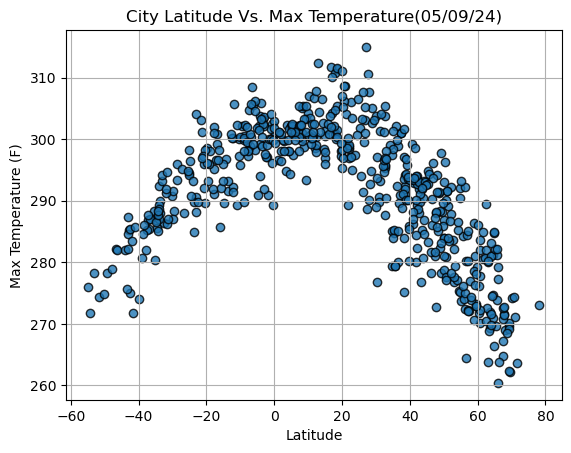

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidth=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

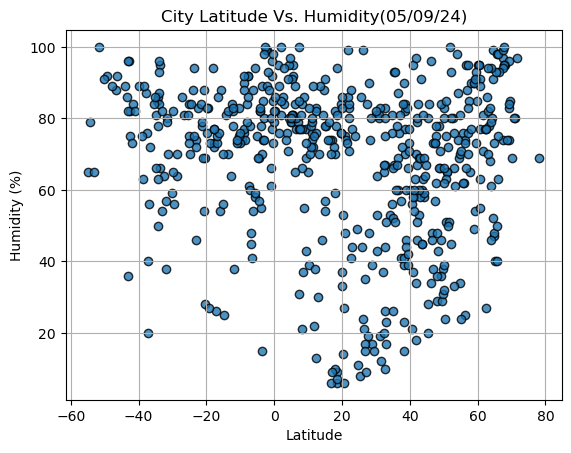

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

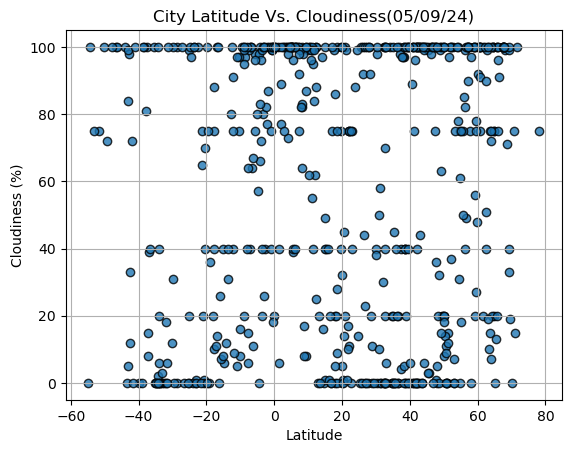

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

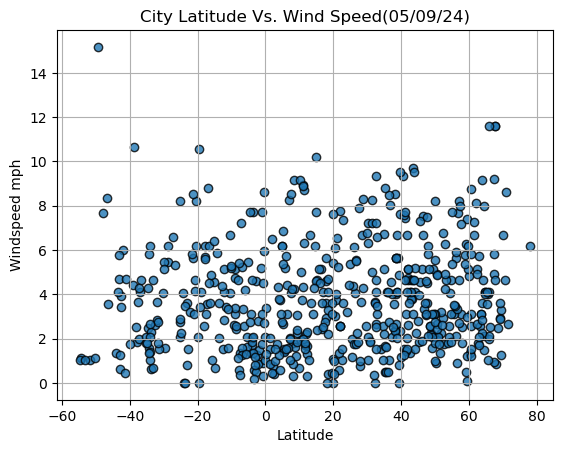

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data_file/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,borgarnes,64.5383,-21.9206,281.18,52,100,1.48,IS,1715282294
3,lisala,2.1500,21.5167,298.14,81,89,0.76,CD,1715282296
4,ust-nera,64.5667,143.2000,274.62,91,100,2.12,RU,1715282297
5,sur,22.5667,59.5289,306.02,41,0,1.05,OM,1715282298
9,dushanbe,38.5577,68.7797,291.05,82,40,4.00,TJ,1715282302


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,281.94,89,100,1.34,NZ,1715282293
2,port-aux-francais,-49.3500,70.2167,278.23,92,72,15.17,TF,1715282295
6,port mathurin,-19.6833,63.4167,298.54,76,100,10.57,MU,1715282299
7,rabaul,-4.1967,152.1721,299.18,82,100,1.33,PG,1715282299
8,puerto ayora,-0.7393,-90.3518,300.13,92,99,0.89,EC,1715282301


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8338717678832344


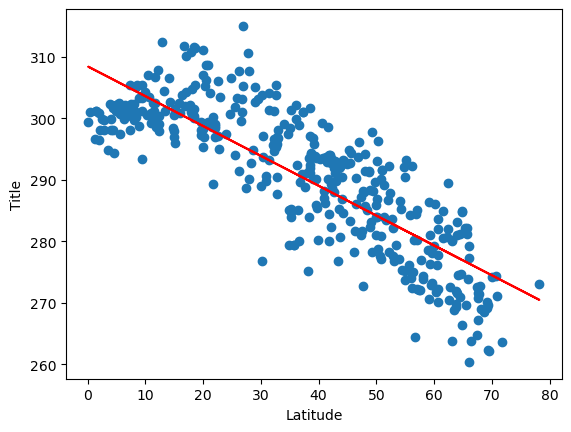

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.savefig("output_data_file/Fig5.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8416907249944907


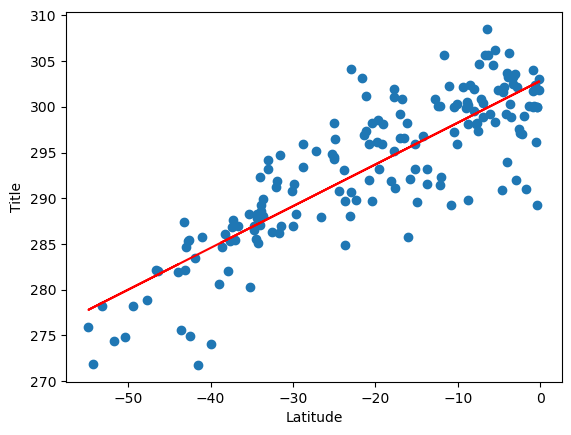

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.savefig("output_data_file/Fig6.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06638961974656189


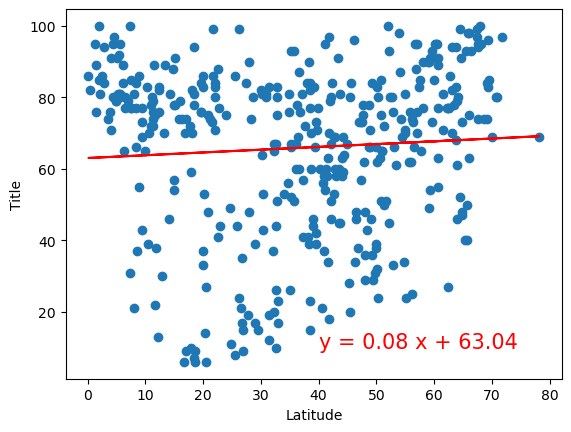

In [21]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.savefig("output_data_file/Fig7.png")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.014545769093273164


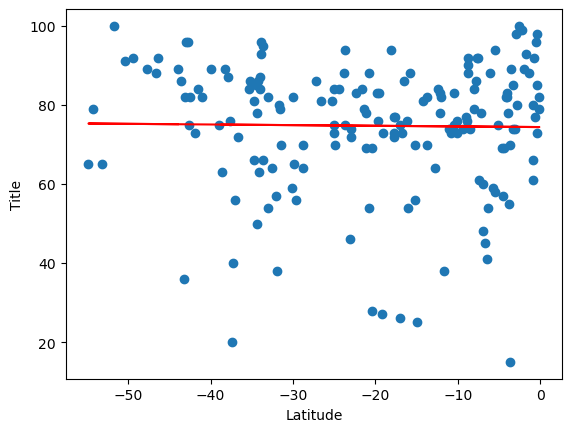

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.savefig("output_data_file/Fig8.png")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.007210841288428809


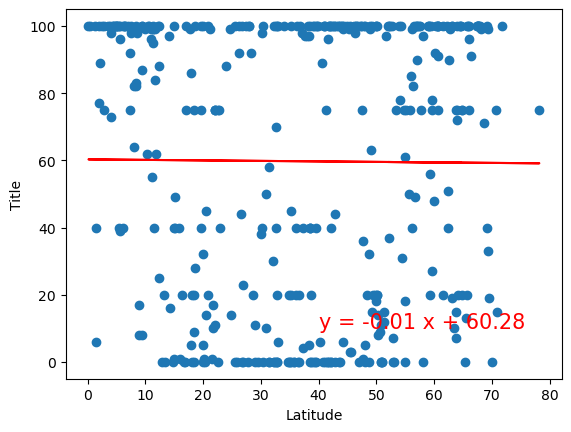

In [23]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.savefig("output_data_file/Fig9.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.22335974646438475


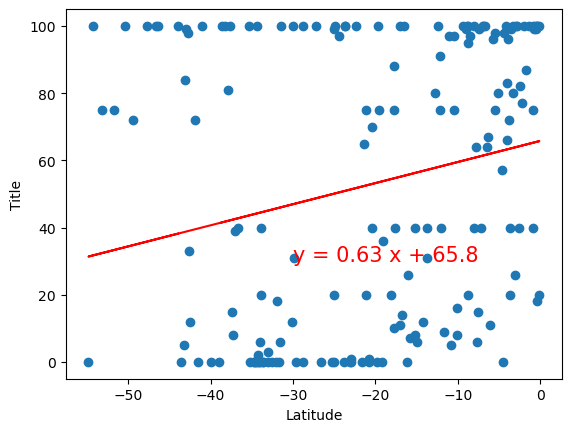

In [24]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.savefig("output_data_file/Fig10.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.13292593945102674


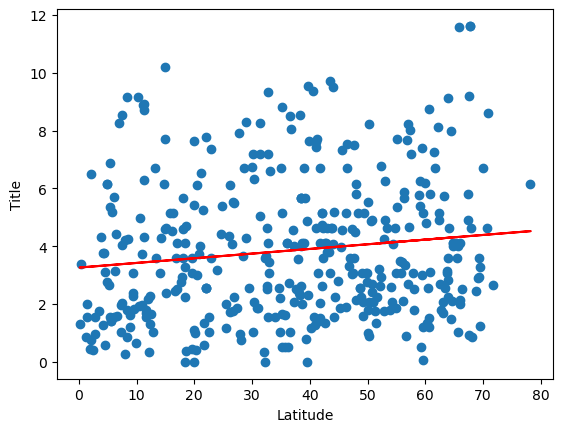

In [25]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.savefig("output_data_file/Fig11.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.06451642189299044


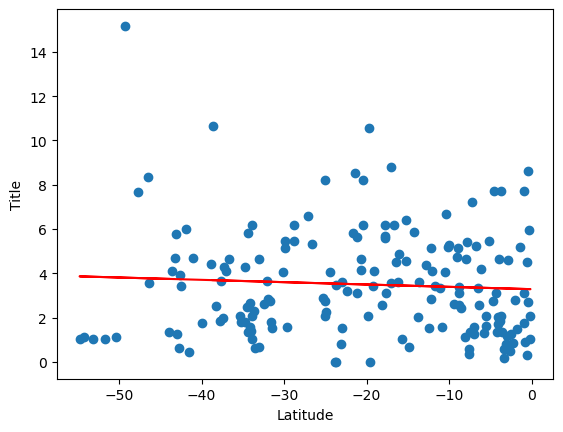

In [26]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.savefig("output_data_file/Fig12.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))